## SMOTE class balancing (example)
* [Credit: SMOTE for Imbalanced Classification with Python](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification)


In [1]:
import imblearn as imb
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from matplotlib import pyplot

# define dataset
x, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

# summarize class distribution
counter = Counter(y)
print(counter)

x_resampled, y_resampled = SMOTE().fit_resample(x, y)

Counter({2: 4674, 1: 262, 0: 64})


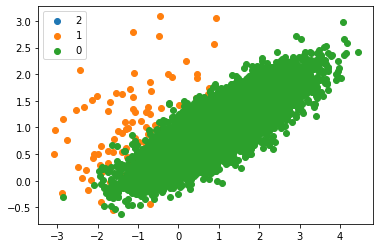

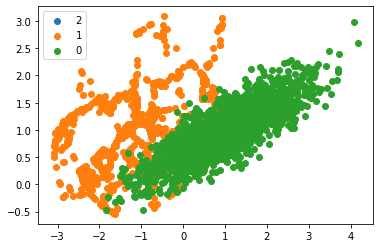

original: Counter({2: 4674, 1: 262, 0: 64})
balanced: Counter({0: 1980, 1: 990})
Mean ROC AUC: 0.771
Mean ROC AUC: 0.839


In [2]:
# load dependencies
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline# define dataset

# define dataset
x, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	pyplot.scatter(x[row_ix, 0], x[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# define class balancing pipeline: first oversample, then undersample
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)

# create new datasets
x2, y2 = pipeline.fit_resample(x, y)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y2 == label)[0]
	pyplot.scatter(x2[row_ix, 0], x2[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# summarize counts of the new class distribution
counter2 = Counter(y2)
print(f'original: {counter}\nbalanced: {counter2}')

# define model (applied to original dataset)
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

# define model (applied to balanced dataset

# define pipeline
#steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

In [4]:
# SMOTE uses k-nearest neighbours value of k=5 by default
# we can grid search some values to see if it changes our results

# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = DecisionTreeClassifier()
	over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = np.mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.835
> k=2, Mean ROC AUC: 0.833
> k=3, Mean ROC AUC: 0.828
> k=4, Mean ROC AUC: 0.841
> k=5, Mean ROC AUC: 0.835
> k=6, Mean ROC AUC: 0.853
> k=7, Mean ROC AUC: 0.843
